In [1]:
import numpy as np
import pandas as pd

In [66]:
m2 = pd.read_csv('merged_data.csv', dtype={"CLNT_ID":np.str, "SESS_ID":np.str},thousands=",")
m2.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,57.000000,38000.000000,1.0,46.500000,417.000000,20,0,1,1,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
1,284.000000,34900.000000,1.0,256.000000,7098.000000,30,1,0,0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
2,58.000000,15360.000000,1.0,98.200000,2169.000000,40,0,1,0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,5.0,0.0
3,47.333333,7933.333333,1.0,45.666667,1157.666667,40,1,0,2,0.0,...,0,0,0,0.0,0.0,0,1,0.0,0.0,2.0
4,209.000000,21850.000000,1.0,195.000000,3161.000000,30,1,0,0,0.0,...,0,0,0,1.0,0.0,0,0,0.0,5.0,0.0


In [380]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,MaxAbsScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 20대 남성

In [8]:
m2['CLNT_AGE'].value_counts()

30    313493
40    216161
20     95263
50     36615
60      5255
10      3807
70       844
80        32
Name: CLNT_AGE, dtype: int64

In [12]:
#M_20 = m2.loc[m2['CLNT_AGE']==20]

In [67]:
M_20 = m2.loc[(m2['GENDER_M']==1) & (m2['CLNT_AGE']==20)]
M_20.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,57.00,38000.0,1.0,46.50,417.0,20,0,1,1,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
26,296.25,62030.0,1.0,293.75,1522.5,20,0,1,2,0.0,...,0,1,0,3.0,0.0,0,0,0.0,0.0,0.0
74,74.00,99500.0,1.0,59.00,2250.0,20,0,1,0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
91,50.50,37000.0,2.0,52.00,507.5,20,0,1,1,0.0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,2.0
154,35.00,29260.0,1.0,34.00,587.0,20,0,1,2,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0


In [864]:
#대대분류 삭제
M_20_drop = M_20.drop(M_20.loc[:, M_20.columns.str.startswith('CLAC0')], axis = 1)
M_20_drop.columns

Index(['HITS_SEQ', 'PD_BUY_AM', 'PD_BUY_CT', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'CLNT_AGE', 'GENDER_F', 'GENDER_M', 'weekend',
       'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9'],
      dtype='object')

In [865]:
mms = MinMaxScaler()
mms.fit(M_20_drop) #대대분류 뺀 column들만 갖고
M_20_transformed = mms.transform(M_20_drop)

In [70]:
Sum_of_squared_distances = []

for k in range(1,15):
    km = KMeans(n_clusters=k)
    km = km.fit(M_20_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


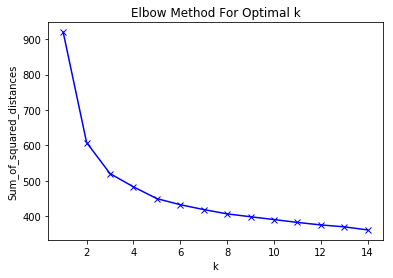

In [71]:
plt.plot(range(1,15), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [866]:
k=3
km = KMeans(n_clusters=k, algorithm='auto')
km.fit(M_20_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [867]:
M_20_transformed = pd.DataFrame(M_20_transformed)
M_20_transformed.columns = m2.columns[:34]
M_20_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.112705,0.002329,0.000000,0.091365,0.035825,0.0,0.0,0.0,0.027027,0.0,...,0.0,0.0,0.013699,0.0,0.000000,0.0,0.086957,0.000000,0.000000,0.000000
1,0.602971,0.003806,0.000000,0.587851,0.131259,0.0,0.0,0.0,0.054054,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.121212
2,0.147541,0.006108,0.000000,0.116466,0.194061,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.076923,0.000000
3,0.099385,0.002268,0.011844,0.102410,0.043638,0.0,0.0,0.0,0.027027,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.027778,0.038462,0.000000
4,0.067623,0.001792,0.000000,0.066265,0.050501,0.0,0.0,0.0,0.054054,0.0,...,0.0,0.0,0.000000,0.0,0.046512,0.0,0.000000,0.000000,0.000000,0.000000


In [868]:
M_20_transformed['predict'] = km.predict(M_20_transformed)
M_20_transformed['predict'].value_counts()

0    8650
1    3523
2     846
Name: predict, dtype: int64

In [869]:
M_20_transformed.index = M_20.index

In [870]:
M_20_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9,predict
0,0.112705,0.002329,0.000000,0.091365,0.035825,0.0,0.0,0.0,0.027027,0.0,...,0.0,0.013699,0.0,0.000000,0.0,0.086957,0.000000,0.000000,0.000000,0
26,0.602971,0.003806,0.000000,0.587851,0.131259,0.0,0.0,0.0,0.054054,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.121212,2
74,0.147541,0.006108,0.000000,0.116466,0.194061,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.076923,0.000000,1
91,0.099385,0.002268,0.011844,0.102410,0.043638,0.0,0.0,0.0,0.027027,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.027778,0.038462,0.000000,0
154,0.067623,0.001792,0.000000,0.066265,0.050501,0.0,0.0,0.0,0.054054,0.0,...,0.0,0.000000,0.0,0.046512,0.0,0.000000,0.000000,0.000000,0.000000,0


<BarContainer object of 10 artists>

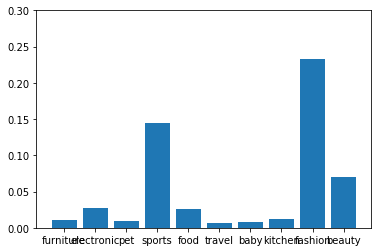

In [871]:
labels=['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
sum_of_sum = M_20[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
plt.ylim(0, 0.3)
#group0
idx=np.where(M_20_transformed['predict']==0)
clustering = M_20.loc[M_20.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

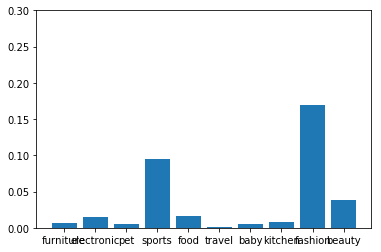

In [872]:
#group1
idx=np.where(M_20_transformed['predict']==1)
clustering = M_20.loc[M_20.index[idx]] 
plt.ylim(0, 0.3)
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

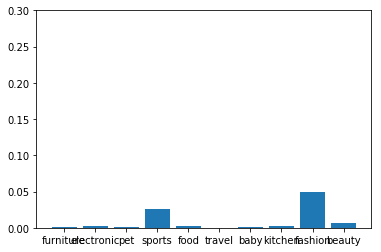

In [873]:
#group2
idx=np.where(M_20_transformed['predict']==2)
clustering = M_20.loc[M_20.index[idx]] 
plt.ylim(0, 0.3)
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

# Scoring

In [874]:
import matplotlib.pyplot as pyplot

In [875]:
#clac0부터 순서대로
labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']

In [876]:
def clustering_index(k, new_data, data, transformed_data, category) :
    
    #k : clustering 개수
    #new_data : new data
    #data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    #transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    #category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([3,10])
    for kk in range(k) :
       # sum_of_sum = data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        idx=np.where(M_20_transformed['predict']==kk)

        clustering = data.loc[data.index[idx]] 
        sum_of_sum = clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        category_rate[kk] = log(clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()+0.0000000001)/sum_of_sum

    
    diatance_from_centers = [0] * k

    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data)**2))
        
    result = [0] * k
    for i in range(k) :
        result[i] = category_rate[i][category]/diatance_from_centers[i]
    
    return sum(result)

In [877]:
import random

In [878]:
#random data generate
for ii in range(10) :
    random_idx = M_20_transformed.index[random.randint(0,len(M_20_transformed))]
    random_data = M_20_transformed.loc[random_idx, :"month_9"]
    diatance_from_centers = [0] * k
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - random_data)**2))

    print(diatance_from_centers)

[0.7126920055226809, 0.5032650304955354, 0.24495935606600533]
[0.39135299228174525, 0.20167483840407235, 0.3306333802823344]
[0.13370682524119115, 0.17332328674091974, 0.556382100953844]
[0.40680027307404, 0.39591068107922295, 0.6723599989686795]
[0.1145412772676523, 0.19389480277478466, 0.5935330791359562]
[0.08457072914447732, 0.2994946125544863, 0.7098067927742577]
[0.1016118073904403, 0.3134861698984624, 0.7254022427173995]
[0.20797838779046268, 0.09586478081547235, 0.4575956690670667]
[0.11713724885314064, 0.28753810336341434, 0.6894497317677983]
[0.4531020794289849, 0.25084599174743333, 0.2877667641974581]


In [879]:
score=[]
for i in range(10) :
    score.append(clustering_index(3, random_data, M_20, M_20_transformed, i)*10000)
score=pd.DataFrame(score)
labels_=pd.DataFrame(labels)
buylist=pd.DataFrame(M_20.loc[random_idx,'CLAC0_0':'CLAC0_9'].values)
scoreDF=pd.concat([labels_,score,buylist], axis=1)
scoreDF.columns=['Category','Score','Buy_CT']
scoreDF.sort_values(['Score'],ascending=False)

,Category,Score,Buy_CT
8,fashion,98.592424,2.0
3,sports,90.988784,0.0
9,beauty,76.387843,0.0
1,electronic,64.161623,0.0
4,food,62.842635,0.0
7,kitchen,62.393218,0.0
6,baby,54.377731,0.0
0,furniture,53.899414,0.0
2,pet,46.350059,0.0
5,travel,37.823969,0.0


# 50대 여성

In [880]:
F_50 = m2.loc[(m2['GENDER_F']==1) & (m2['CLNT_AGE']==50)]
F_50.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
50,22.250000,246562.500000,1.0,29.250000,180.250000,50,1,0,1,0.0,...,1,1,0,0.0,0.0,0,0,0.0,1.0,1.0
97,35.600000,61800.000000,1.0,41.600000,1716.200000,50,1,0,0,0.0,...,0,0,0,1.0,0.0,0,0,0.0,4.0,0.0
112,51.600000,34800.000000,1.0,60.000000,1254.800000,50,1,0,1,0.0,...,0,0,0,0.0,0.0,0,0,0.0,5.0,0.0
157,92.111111,33377.777778,1.0,140.777778,4183.555556,50,1,0,0,0.0,...,0,0,0,0.0,2.0,0,0,0.0,7.0,0.0
250,81.000000,6000.000000,1.0,81.000000,1625.000000,50,1,0,6,0.0,...,0,0,0,0.0,0.0,0,0,0.0,6.0,0.0


In [881]:
#대대분류 삭제
F_50_drop = F_50.drop(F_50.loc[:, F_50.columns.str.startswith('CLAC0')], axis = 1)
F_50_drop.columns
mms = MinMaxScaler()
mms.fit(F_50_drop) #대대분류 뺀 column들만 갖고
F_50_transformed = mms.transform(F_50_drop)

In [882]:
Sum_of_squared_distances = []

for k in range(1,30):
    km = KMeans(n_clusters=k)
    km = km.fit(F_50_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    print(k)

1
2
3
4


KeyboardInterrupt: 

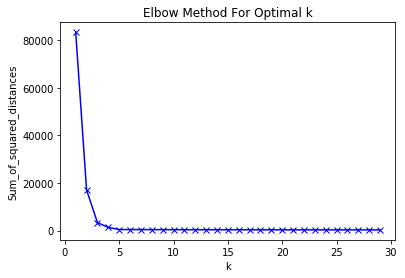

In [187]:
plt.plot(range(1,30), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [883]:
k=3
km = KMeans(n_clusters=k, algorithm='auto')
km.fit(F_50_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [884]:
F_50_transformed = pd.DataFrame(F_50_transformed)
F_50_transformed.columns = m2.columns[:34]
F_50_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.040909,0.069814,0.0,0.054829,0.012595,0.0,0.0,0.0,0.002545,0.0,...,0.0,0.0,0.005908,0.0,0.002717,0.000000,0.006211,0.000000,0.003484,0.000000
1,0.067879,0.017477,0.0,0.079678,0.121737,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.012500,0.003106,0.000000,0.000000,0.000000
2,0.100202,0.009829,0.0,0.116700,0.088950,0.0,0.0,0.0,0.002545,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.009317,0.010050,0.000000,0.000000
3,0.182043,0.009426,0.0,0.279231,0.297062,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.015625,0.000000,0.005025,0.010453,0.000000
4,0.159596,0.001671,0.0,0.158954,0.115256,0.0,0.0,0.0,0.015267,0.0,...,0.0,0.0,0.008863,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.035928


In [885]:
F_50_transformed['predict'] = km.predict(F_50_transformed)
F_50_transformed['predict'].value_counts()

2    17459
0     9120
1     2295
Name: predict, dtype: int64

In [886]:
F_50_transformed.index = F_50.index
F_50_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9,predict
50,0.040909,0.069814,0.0,0.054829,0.012595,0.0,0.0,0.0,0.002545,0.0,...,0.0,0.005908,0.0,0.002717,0.000000,0.006211,0.000000,0.003484,0.000000,2
97,0.067879,0.017477,0.0,0.079678,0.121737,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.012500,0.003106,0.000000,0.000000,0.000000,2
112,0.100202,0.009829,0.0,0.116700,0.088950,0.0,0.0,0.0,0.002545,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.009317,0.010050,0.000000,0.000000,2
157,0.182043,0.009426,0.0,0.279231,0.297062,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.015625,0.000000,0.005025,0.010453,0.000000,0
250,0.159596,0.001671,0.0,0.158954,0.115256,0.0,0.0,0.0,0.015267,0.0,...,0.0,0.008863,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.035928,0


<BarContainer object of 10 artists>

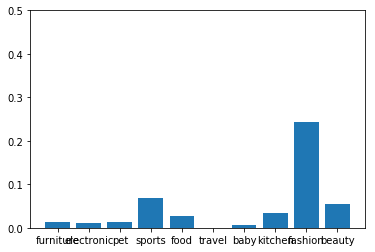

In [887]:
labels=['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
sum_of_sum = F_50[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
plt.ylim(0, 0.5)
#group0
idx=np.where(F_50_transformed['predict']==0)
clustering = F_50.loc[F_50.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

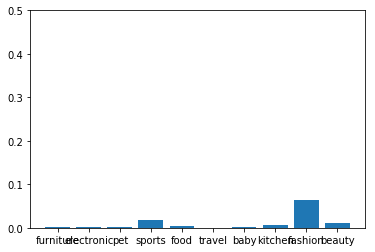

In [888]:
plt.ylim(0, 0.5)
#group1
idx=np.where(F_50_transformed['predict']==1)
clustering = F_50.loc[F_50.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

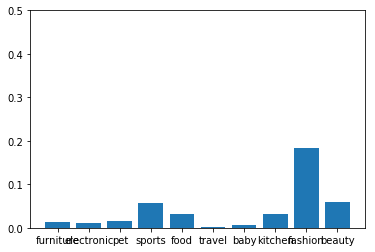

In [889]:
plt.ylim(0, 0.5)
#group2
idx=np.where(F_50_transformed['predict']==2)
clustering = F_50.loc[F_50.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

In [890]:
def clustering_index(k, new_data, data, transformed_data, category) :
    
    #k : clustering 개수
    #new_data : new data
    #data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    #transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    #category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([3,10])
    for kk in range(k) :
       # sum_of_sum = data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        idx=np.where(M_20_transformed['predict']==kk)

        clustering = data.loc[data.index[idx]] 
        sum_of_sum = clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        category_rate[kk] = log(clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum())/sum_of_sum

    
    diatance_from_centers = [0] * k

    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data)**2))
        
    result = [0] * k
    for i in range(k) :
        result[i] = category_rate[i][category]/diatance_from_centers[i]
    
    return sum(result)

In [891]:
import random
#random data generate
for ii in range(10) :
    random_idx = F_50_transformed.index[random.randint(0,len(F_50_transformed))]
    random_data = F_50_transformed.loc[random_idx, :"month_9"]
    diatance_from_centers = [0] * k
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - random_data)**2))

    print(diatance_from_centers)

[0.2518195711388923, 0.6135853749224128, 0.0393490729838436]
[0.10473173134784504, 0.4609748080064689, 0.1248358720105484]
[0.2745374924877145, 0.6369113373970704, 0.060650827235412166]
[0.26591980077093524, 0.628581373395835, 0.05089403107601959]
[0.3091059959058453, 0.6696523330937856, 0.09926609375698416]
[0.13833880334847537, 0.4995233382302586, 0.08599014978275384]
[0.3367809913798648, 0.6981872143027885, 0.12240083469202163]
[0.0795623326293702, 0.4151169547166053, 0.18287557184614692]
[0.17349366713990766, 0.5326555048792264, 0.08214938757697182]
[0.17484259644187167, 0.5316522107290531, 0.06881822498331053]


In [892]:
score=[]
for i in range(10) :
    score.append(clustering_index(3, random_data, F_50, F_50_transformed, i)*10000)
score=pd.DataFrame(score)
labels_=pd.DataFrame(labels)
buylist=pd.DataFrame(F_50.loc[random_idx,'CLAC0_0':'CLAC0_9'].values)
scoreDF=pd.concat([labels_,score,buylist], axis=1)
scoreDF.columns=['Category','Score','Buy_CT']
scoreDF.sort_values(['Score'],ascending=False)

,Category,Score,Buy_CT
8,fashion,206.725447,1.0
3,sports,178.169428,3.0
9,beauty,173.890183,1.0
4,food,154.679861,0.0
7,kitchen,151.717366,1.0
0,furniture,138.594991,0.0
2,pet,136.289856,0.0
1,electronic,131.695115,0.0
6,baby,119.621868,0.0
5,travel,23.109491,0.0


# 40대 남성

In [151]:
M_40 = m2.loc[(m2['GENDER_M']==1) & (m2['CLNT_AGE']==40)]
M_40.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
2,58.000000,15360.000000,1.000000,98.200000,2169.000000,40,0,1,0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,5.0,0.0
10,36.000000,71100.000000,1.000000,46.000000,415.500000,40,0,1,1,0.0,...,0,0,0,1.0,1.0,0,0,0.0,0.0,0.0
13,12.000000,39000.000000,1.000000,11.000000,71.000000,40,0,1,0,0.0,...,0,0,0,2.0,0.0,0,0,0.0,0.0,0.0
19,80.833333,66433.333333,1.000000,103.500000,1126.500000,40,0,1,1,0.0,...,0,0,0,3.0,0.0,0,0,0.0,3.0,0.0
38,118.333333,49643.333333,1.666667,160.666667,1993.333333,40,0,1,4,0.0,...,0,0,6,0.0,0.0,0,0,0.0,0.0,0.0


In [816]:
#대대분류 삭제
M_40_drop = M_40.drop(M_40.loc[:, M_40.columns.str.startswith('CLAC0')], axis = 1)
M_40_drop.columns
#mms = MinMaxScaler()
mms=MaxAbsScaler()
mms.fit(M_40_drop) #대대분류 뺀 column들만 갖고
M_40_transformed = mms.transform(M_40_drop)

In [817]:
Sum_of_squared_distances = []

for k in range(1,15):
    km = KMeans(n_clusters=k)
    km = km.fit(M_40_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    print(k)

1
2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

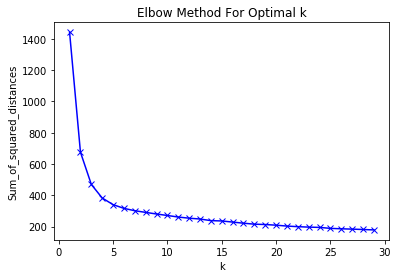

In [154]:
plt.plot(range(1,15), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [818]:
k=4
km = KMeans(n_clusters=k, algorithm='auto')
km.fit(M_40_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [819]:
M_40_transformed = pd.DataFrame(M_40_transformed)
M_40_transformed.columns = m2.columns[:34]
M_40_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.094856,0.001603,0.001717,0.091516,0.061650,1.0,1.0,0.0,0.001961,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.001346,0.000000,0.003617,0.000000
1,0.062926,0.003504,0.002060,0.153507,0.094504,1.0,1.0,0.0,0.004902,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.024631
2,0.139187,0.024504,0.001717,0.151394,0.070716,1.0,1.0,0.0,0.000980,0.0,...,0.0,0.0,0.0,0.0,0.001727,0.0,0.004038,0.000000,0.000000,0.034483
3,0.032064,0.006245,0.001717,0.040080,0.011423,1.0,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.003454,0.0,0.000000,0.000000,0.000000,0.000000
4,0.063460,0.010543,0.001717,0.097528,0.032929,1.0,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.001727,0.0,0.000000,0.003221,0.000000,0.000000


In [820]:
M_40_transformed = pd.DataFrame(M_40_transformed)
M_40_transformed.columns = m2.columns[:34]
M_40_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.094856,0.001603,0.001717,0.091516,0.061650,1.0,1.0,0.0,0.001961,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.001346,0.000000,0.003617,0.000000
1,0.062926,0.003504,0.002060,0.153507,0.094504,1.0,1.0,0.0,0.004902,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.024631
2,0.139187,0.024504,0.001717,0.151394,0.070716,1.0,1.0,0.0,0.000980,0.0,...,0.0,0.0,0.0,0.0,0.001727,0.0,0.004038,0.000000,0.000000,0.034483
3,0.032064,0.006245,0.001717,0.040080,0.011423,1.0,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.003454,0.0,0.000000,0.000000,0.000000,0.000000
4,0.063460,0.010543,0.001717,0.097528,0.032929,1.0,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.001727,0.0,0.000000,0.003221,0.000000,0.000000


In [821]:
M_40_transformed['predict'] = km.predict(M_40_transformed)
M_40_transformed['predict'].value_counts()

3    88441
1    58380
0    26631
2     6900
Name: predict, dtype: int64

In [822]:
M_40_transformed.index = M_40.index
M_40_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9,predict
3,0.094856,0.001603,0.001717,0.091516,0.061650,1.0,1.0,0.0,0.001961,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.001346,0.000000,0.003617,0.000000,3
5,0.062926,0.003504,0.002060,0.153507,0.094504,1.0,1.0,0.0,0.004902,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.024631,3
6,0.139187,0.024504,0.001717,0.151394,0.070716,1.0,1.0,0.0,0.000980,0.0,...,0.0,0.0,0.0,0.001727,0.0,0.004038,0.000000,0.000000,0.034483,1
7,0.032064,0.006245,0.001717,0.040080,0.011423,1.0,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.003454,0.0,0.000000,0.000000,0.000000,0.000000,3
9,0.063460,0.010543,0.001717,0.097528,0.032929,1.0,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.001727,0.0,0.000000,0.003221,0.000000,0.000000,3


<BarContainer object of 10 artists>

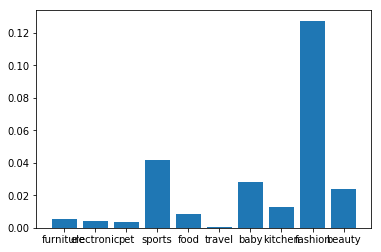

In [823]:
labels=['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
sum_of_sum = M_40[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
#plt.ylim(0, 0.2)
#group0
idx=np.where(M_40_transformed['predict']==0)
clustering = M_40.loc[M_40.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

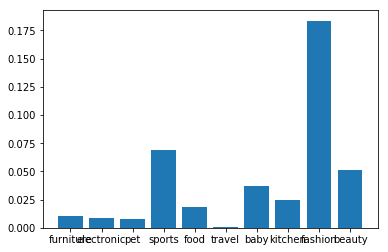

In [824]:
#plt.ylim(0, 0.2)
#group1
idx=np.where(M_40_transformed['predict']==1)
clustering = M_40.loc[M_40.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

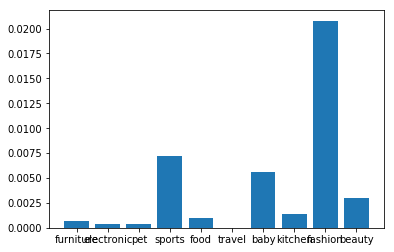

In [825]:
#plt.ylim(0, 0.2)
#group2
idx=np.where(M_40_transformed['predict']==2)
clustering = M_40.loc[M_40.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

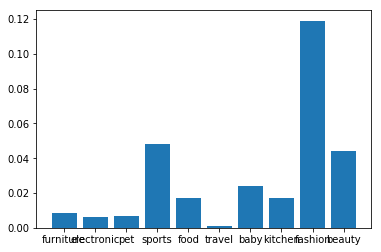

In [826]:
#plt.ylim(0, 0.2)
#group3
idx=np.where(M_40_transformed['predict']==3)
clustering = M_40.loc[M_40.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

In [848]:
def clustering_index(k, new_data, data, transformed_data, category) :
    
    #k : clustering 개수
    #new_data : new data
    #data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    #transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    #category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([4,10])
    for kk in range(k) :
       # sum_of_sum = data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        idx=np.where(M_40_transformed['predict']==kk)

        clustering = data.loc[data.index[idx]] 
        sum_of_sum = clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        category_rate[kk] = log(clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()+0.0000000001)/sum_of_sum

    
    diatance_from_centers = [0] * k

    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data)**2))
        
    result = [0] * k
    for i in range(k) :
        result[i] = (category_rate[i][category]/diatance_from_centers[i])
    
    return sum(result)

In [862]:
import random
#random data generate
for ii in range(10) :
    random_idx = M_40_transformed.index[random.randint(0,len(M_40_transformed))]
    random_data = M_40_transformed.loc[random_idx, :"month_9"]
    diatance_from_centers = [0] * k
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - random_data)**2))

    print(diatance_from_centers)

[0.1659566769347624, 0.08300395425594467, 0.5258572066061459, 0.22613060601853074]
[0.22028141507213453, 0.10701124400790185, 0.5723920372959015, 0.21545933138796605]
[0.40930914839265464, 0.1919053253096602, 0.7745182281701971, 0.03673054358939706]
[0.43946985271660655, 0.22227222878498132, 0.8043300536029783, 0.06628896755927767]
[0.4466362281143694, 0.2288062169552326, 0.8119448358483907, 0.07153306982191274]
[0.2928442292230455, 0.4031084978260464, 0.3940771054733193, 0.5230269500286319]
[0.291852665195426, 0.07798099139435977, 0.6567608402677846, 0.0938200387503151]
[0.4160572813585361, 0.19885681747601247, 0.7811900947880955, 0.04418991283713764]
[0.2593782089490215, 0.0560579261717134, 0.6234052090195052, 0.12409563639291034]
[0.4419884259923226, 0.22393537261254923, 0.80777231253286, 0.06932188454066181]


In [863]:
score=[]
for i in range(10) :
    score.append(clustering_index(4, random_data, M_40, M_40_transformed, i)*10000)
score=pd.DataFrame(score)
labels_=pd.DataFrame(labels)
buylist=pd.DataFrame(M_40.loc[random_idx,'CLAC0_0':'CLAC0_9'].values)
scoreDF=pd.concat([labels_,score,buylist], axis=1)
scoreDF.columns=['Category','Score','Buy_CT']
scoreDF.sort_values(['Score'],ascending=False)

,Category,Score,Buy_CT
8,fashion,8.432431,0.0
3,sports,7.717600,2.0
9,beauty,7.428272,0.0
6,baby,7.334782,0.0
7,kitchen,6.820585,0.0
4,food,6.689946,0.0
0,furniture,6.268428,0.0
1,electronic,6.029430,0.0
2,pet,6.026952,0.0
5,travel,4.208139,0.0


# 40대 여성

In [787]:
F_40 = m2.loc[(m2['GENDER_F']==1) & (m2['CLNT_AGE']==40)]
F_40.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
3,47.333333,7933.333333,1.0,45.666667,1157.666667,40,1,0,2,0.0,...,0,0,0,0.0,0.0,0,1,0.0,0.0,2.0
5,31.400000,17340.000000,1.2,76.600000,1774.600000,40,1,0,5,0.0,...,0,0,0,0.0,0.0,0,0,5.0,0.0,0.0
6,69.454545,121248.181818,1.0,75.545455,1327.909091,40,1,0,1,0.0,...,0,0,0,0.0,0.0,0,0,0.0,6.0,5.0
7,16.000000,30900.000000,1.0,20.000000,214.500000,40,1,0,0,0.0,...,0,0,0,2.0,0.0,0,0,0.0,0.0,0.0
9,31.666667,52166.666667,1.0,48.666667,618.333333,40,1,0,0,0.0,...,0,0,0,1.0,0.0,0,0,0.0,1.0,1.0


In [788]:
#대대분류 삭제
F_40_drop = F_40.drop(F_40.loc[:, F_40.columns.str.startswith('CLAC0')], axis = 1)
F_40_drop.columns
mms = MinMaxScaler()
mms.fit(F_40_drop) #대대분류 뺀 column들만 갖고
F_40_transformed = mms.transform(F_40_drop)

In [294]:
Sum_of_squared_distances = []

for k in range(1,15):
    km = KMeans(n_clusters=k)
    km = km.fit(F_40_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    print(k)

1
2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

In [ ]:
plt.plot(range(1,15), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [789]:
k=3
km = KMeans(n_clusters=k, algorithm='auto')
km.fit(F_40_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [790]:
F_40_transformed = pd.DataFrame(F_40_transformed)
F_40_transformed.columns = m2.columns[:34]
F_40_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.091214,0.001583,0.000000,0.089692,0.061600,0.0,0.0,0.0,0.001961,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.001346,0.000000,0.003617,0.000000
1,0.059155,0.003484,0.000344,0.151807,0.094456,0.0,0.0,0.0,0.004902,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.024631
2,0.135723,0.024485,0.000000,0.149690,0.070667,0.0,0.0,0.0,0.000980,0.0,...,0.0,0.0,0.0,0.0,0.001727,0.0,0.004038,0.000000,0.000000,0.034483
3,0.028169,0.006225,0.000000,0.038153,0.011370,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.003454,0.0,0.000000,0.000000,0.000000,0.000000
4,0.059691,0.010523,0.000000,0.095716,0.032877,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.001727,0.0,0.000000,0.003221,0.000000,0.000000


In [791]:
F_40_transformed = pd.DataFrame(F_40_transformed)
F_40_transformed.columns = m2.columns[:34]
F_40_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.091214,0.001583,0.000000,0.089692,0.061600,0.0,0.0,0.0,0.001961,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.001346,0.000000,0.003617,0.000000
1,0.059155,0.003484,0.000344,0.151807,0.094456,0.0,0.0,0.0,0.004902,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.024631
2,0.135723,0.024485,0.000000,0.149690,0.070667,0.0,0.0,0.0,0.000980,0.0,...,0.0,0.0,0.0,0.0,0.001727,0.0,0.004038,0.000000,0.000000,0.034483
3,0.028169,0.006225,0.000000,0.038153,0.011370,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.003454,0.0,0.000000,0.000000,0.000000,0.000000
4,0.059691,0.010523,0.000000,0.095716,0.032877,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.001727,0.0,0.000000,0.003221,0.000000,0.000000


In [792]:
F_40_transformed['predict'] = km.predict(F_40_transformed)
F_40_transformed['predict'].value_counts()

2    110137
0     55774
1     14441
Name: predict, dtype: int64

In [793]:
F_40_transformed.index = F_40.index
F_40_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9,predict
3,0.091214,0.001583,0.000000,0.089692,0.061600,0.0,0.0,0.0,0.001961,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.001346,0.000000,0.003617,0.000000,2
5,0.059155,0.003484,0.000344,0.151807,0.094456,0.0,0.0,0.0,0.004902,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.024631,2
6,0.135723,0.024485,0.000000,0.149690,0.070667,0.0,0.0,0.0,0.000980,0.0,...,0.0,0.0,0.0,0.001727,0.0,0.004038,0.000000,0.000000,0.034483,2
7,0.028169,0.006225,0.000000,0.038153,0.011370,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.003454,0.0,0.000000,0.000000,0.000000,0.000000,2
9,0.059691,0.010523,0.000000,0.095716,0.032877,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.001727,0.0,0.000000,0.003221,0.000000,0.000000,2


<BarContainer object of 10 artists>

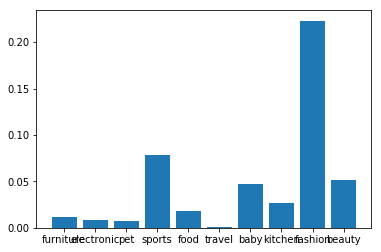

In [796]:
labels=['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
sum_of_sum = F_40[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
#plt.ylim(0, 0.5)
#group0
idx=np.where(F_40_transformed['predict']==0)
clustering = F_40.loc[F_40.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

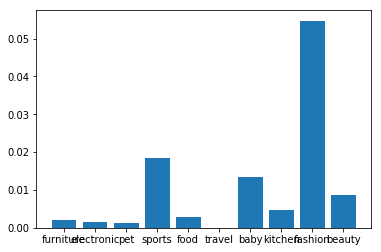

In [797]:
#group1
idx=np.where(F_40_transformed['predict']==1)
clustering = F_40.loc[F_40.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

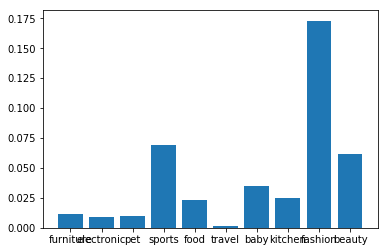

In [798]:
#plt.ylim(0, 0.5)
#group2
idx=np.where(F_40_transformed['predict']==2)
clustering = F_40.loc[F_40.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

In [799]:
#clac0부터 순서대로
labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
def clustering_index(k, new_data, data, transformed_data, category) :
    
    #k : clustering 개수
    #new_data : new data
    #data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    #transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    #category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([3,10])
    for kk in range(k) :
        sum_of_sum = data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        idx=np.where(F_40_transformed['predict']==kk)

        clustering = data.loc[data.index[idx]] 
        category_rate[kk] = log(clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()+0.0000000001)/sum_of_sum

    
    diatance_from_centers = [0] * k

    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data)**2))
        
    result = [0] * k
    for i in range(k) :
        result[i] = category_rate[i][category]/diatance_from_centers[i]
    
    return sum(result)

In [804]:
import random
#random data generate
for ii in range(10) :
    random_idx = F_40_transformed.index[random.randint(0,len(F_40_transformed))]
    random_data = F_40_transformed.loc[random_idx, :"month_9"]
    diatance_from_centers = [0] * k
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - random_data)**2))

    print(diatance_from_centers)

[0.2397328582002698, 0.6067031778849312, 0.025401455814562858]
[0.08922425398478594, 0.4178245689822861, 0.19671660402767072]
[0.26042046238387784, 0.6259682803142296, 0.050646589732336655]
[0.15522737308570825, 0.5193372189501791, 0.07547169272389963]
[0.17481673544210832, 0.5418653180383922, 0.04848257841225434]
[0.2037579406578976, 0.5696780493047844, 0.029657131302751823]
[0.13496423328746188, 0.28878153021410885, 0.33391318956823435]
[0.23620441626098038, 0.6029553946117313, 0.031259586901624906]
[0.23637691224795865, 0.6036389391365528, 0.03768710203705664]
[0.2364580417901397, 0.27227600357189957, 0.4180057023387615]


In [805]:
score=[]
for i in range(10) :
    score.append(clustering_index(3, random_data, F_40, F_40_transformed, i)*10000)
score=pd.DataFrame(score)
labels_=pd.DataFrame(labels)
buylist=pd.DataFrame(F_40.loc[random_idx,'CLAC0_0':'CLAC0_9'].values)
scoreDF=pd.concat([labels_,score,buylist], axis=1)
scoreDF.columns=['Category','Score','Buy_CT']
scoreDF.sort_values(['Score'],ascending=False)

,Category,Score,Buy_CT
8,fashion,0.914419,14.0
3,sports,0.836271,9.0
9,beauty,0.800846,21.0
6,baby,0.799675,16.0
7,kitchen,0.746920,7.0
4,food,0.722609,1.0
0,furniture,0.686871,4.0
1,electronic,0.664334,1.0
2,pet,0.658689,0.0
5,travel,0.453859,0.0


# 60-80 대 남성

In [590]:
M_678 = m2.loc[(m2['GENDER_M']==1)]
M_678 = M_678.loc[(M_678['CLNT_AGE']==60) | (M_678['CLNT_AGE']==70) | (M_678['CLNT_AGE']==80)]  
M_678['CLNT_AGE'].value_counts()

60    1471
70     303
80       9
Name: CLNT_AGE, dtype: int64

In [665]:
#대대분류 삭제
M_678_drop = M_678.drop(M_678.loc[:, M_678.columns.str.startswith('CLAC0')], axis = 1)
M_678_drop.columns
#mms = MinMaxScaler()
mms = MaxAbsScaler()
#mms = RobustScaler()
mms.fit(M_678_drop) #대대분류 뺀 column들만 갖고
M_678_transformed = mms.transform(M_678_drop)

In [610]:
Sum_of_squared_distances = []

for k in range(1,30):
    km = KMeans(n_clusters=k)
    km = km.fit(M_678_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


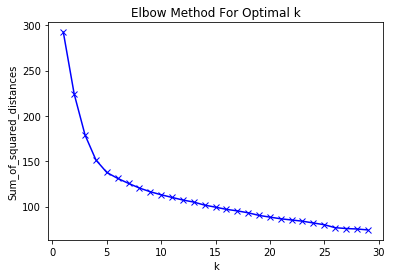

In [611]:
plt.plot(range(1,30), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [666]:
k=5
km = KMeans(n_clusters=k, algorithm='auto')
km.fit(M_678_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [667]:
M_678_transformed = pd.DataFrame(M_678_transformed)
M_678_transformed.columns = m2.columns[:34]
M_678_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.264019,0.132584,0.008065,0.235887,0.258813,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.033333,0.030303,0.000000,0.0,0.000000
1,0.154206,0.030090,0.008065,0.170363,0.173257,0.75,0.0,1.0,0.047619,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.051282
2,0.032710,0.026292,0.008065,0.036290,0.087825,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.014085,0.0,0.0,0.000000,0.030303,0.000000,0.0,0.000000
3,0.188084,0.034157,0.008065,0.157258,0.164671,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.051282
4,0.073598,0.005146,0.014113,0.088710,0.143022,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.030303,0.066667,0.0,0.000000


In [668]:
M_678_transformed = pd.DataFrame(M_678_transformed)
M_678_transformed.columns = m2.columns[:34]
M_678_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.264019,0.132584,0.008065,0.235887,0.258813,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.033333,0.030303,0.000000,0.0,0.000000
1,0.154206,0.030090,0.008065,0.170363,0.173257,0.75,0.0,1.0,0.047619,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.051282
2,0.032710,0.026292,0.008065,0.036290,0.087825,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.014085,0.0,0.0,0.000000,0.030303,0.000000,0.0,0.000000
3,0.188084,0.034157,0.008065,0.157258,0.164671,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.051282
4,0.073598,0.005146,0.014113,0.088710,0.143022,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.030303,0.066667,0.0,0.000000


In [669]:
M_678_transformed['predict'] = km.predict(M_678_transformed)
M_678_transformed['predict'].value_counts()

0    995
4    530
2    163
1     74
3     21
Name: predict, dtype: int64

In [670]:
M_678_transformed.index = M_678.index
M_678_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9,predict
29,0.264019,0.132584,0.008065,0.235887,0.258813,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.033333,0.030303,0.000000,0.0,0.000000,4
247,0.154206,0.030090,0.008065,0.170363,0.173257,0.75,0.0,1.0,0.047619,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.051282,4
378,0.032710,0.026292,0.008065,0.036290,0.087825,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.014085,0.0,0.0,0.000000,0.030303,0.000000,0.0,0.000000,0
817,0.188084,0.034157,0.008065,0.157258,0.164671,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.051282,4
1440,0.073598,0.005146,0.014113,0.088710,0.143022,0.75,0.0,1.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.030303,0.066667,0.0,0.000000,0


<BarContainer object of 10 artists>

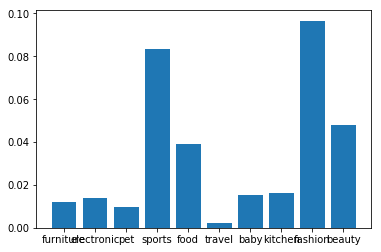

In [671]:
labels=['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
sum_of_sum = M_678[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
#plt.ylim(0, 0.5)
#group0
idx=np.where(M_678_transformed['predict']==0)
clustering = M_678.loc[M_678.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

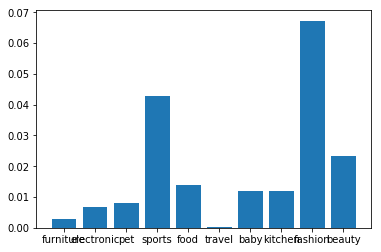

In [672]:
#plt.ylim(0, 0.3)
#group1
idx=np.where(M_678_transformed['predict']==1)
clustering = M_678.loc[M_678.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

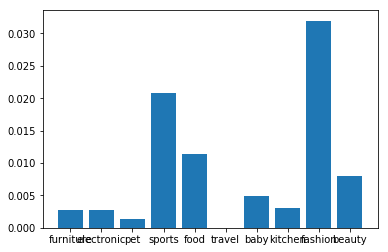

In [673]:
#plt.ylim(0, 0.3)
#group2
idx=np.where(M_678_transformed['predict']==2)
clustering = M_678.loc[M_678.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

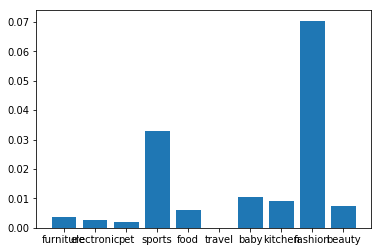

In [674]:
#plt.ylim(0, 0.3)
#group3
idx=np.where(M_678_transformed['predict']==3)
clustering = M_678.loc[M_678.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

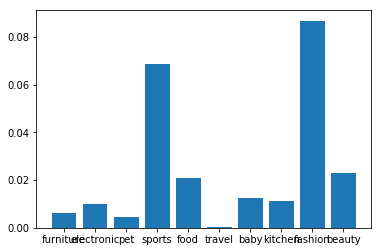

In [675]:
#plt.ylim(0, 0.3)
#group4
idx=np.where(M_678_transformed['predict']==4)
clustering = M_678.loc[M_678.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

In [715]:
def clustering_index(k, new_data, data, transformed_data, category) :
    
    #k : clustering 개수
    #new_data : new data
    #data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    #transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    #category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([5,10])
    for kk in range(k) :
       # sum_of_sum = data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        idx=np.where(M_678_transformed['predict']==kk)

        clustering = data.loc[data.index[idx]] 
        sum_of_sum = clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        category_rate[kk] = log(clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()+0.0000000001)/sum_of_sum

    
    diatance_from_centers = [0] * k

    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data)**2))
        
    result = [0] * k
    for i in range(k) :
        result[i] = (category_rate[i][category]/diatance_from_centers[i])
    
    return sum(result)

In [721]:
import random
#random data generate
for ii in range(10) :
    random_idx = M_678_transformed.index[random.randint(0,len(M_678_transformed))]
    random_data = M_678_transformed.loc[random_idx, :"month_9"]
    diatance_from_centers = [0] * k
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - random_data)**2))

    print(diatance_from_centers)

[0.10502601279778308, 0.46639316071878156, 0.5856264620234196, 1.174073653711325, 0.20879689759068473]
[0.18603134341098582, 0.37900320200169046, 0.4829365496502462, 1.090921471943433, 0.12444467557128926]
[0.5565080009843152, 0.5738680161171904, 0.20404661045430972, 1.1630531630587042, 0.330944612815838]
[0.15184488896888057, 0.49594490503409216, 0.678600858754508, 1.176651048075311, 0.309005885197111]
[0.12122313646931293, 0.4936508027187976, 0.6879012466521178, 1.190271044901166, 0.31151838841600776]
[0.08734468662920825, 0.49172350445732055, 0.6777329352946213, 1.1937146041095448, 0.2923497342299916]
[0.14609825534911067, 0.48936421874366365, 0.7521122145473771, 1.1708842540140298, 0.36688320909454153]
[0.18986994051124995, 0.45279588229673884, 0.5074210167158255, 1.1558971089378376, 0.16345553593297257]
[0.19604399216107363, 0.4825630572358493, 0.7618411117046023, 1.1375689794916894, 0.3897217709274212]
[0.08102357730944561, 0.48241923604437026, 0.6812113860096889, 1.1786335342152

In [722]:
score=[]
for i in range(10) :
    score.append(clustering_index(5, random_data, M_678, M_678_transformed, i)*100)
score=pd.DataFrame(score)
labels_=pd.DataFrame(labels)
buylist=pd.DataFrame(M_678.loc[random_idx,'CLAC0_0':'CLAC0_9'].values)
scoreDF=pd.concat([labels_,score,buylist], axis=1)
scoreDF.columns=['Category','Score','Buy_CT']
scoreDF.sort_values(['Score'],ascending=False)

,Category,Score,Buy_CT
8,fashion,5.558054,1.0
3,sports,5.304328,1.0
9,beauty,4.630034,0.0
4,food,4.527278,0.0
6,baby,3.993094,0.0
7,kitchen,3.900397,0.0
1,electronic,3.670578,0.0
0,furniture,3.480704,0.0
2,pet,3.299507,0.0
5,travel,-3.823269,0.0


# 60-80 대 여성

In [723]:
F_678 = m2.loc[(m2['GENDER_F']==1)]
F_678 = F_678.loc[(F_678['CLNT_AGE']==60) | (F_678['CLNT_AGE']==70) | (F_678['CLNT_AGE']==80)]  
F_678['CLNT_AGE'].value_counts()

60    3784
70     541
80      23
Name: CLNT_AGE, dtype: int64

In [773]:
#대대분류 삭제
F_678_drop = F_678.drop(F_678.loc[:, F_678.columns.str.startswith('CLAC0')], axis = 1)
F_678_drop.columns
#mms = MinMaxScaler()
mms = MaxAbsScaler()
#mms = RobustScaler()
mms.fit(F_678_drop) #대대분류 뺀 column들만 갖고
F_678_transformed = mms.transform(F_678_drop)

In [735]:
Sum_of_squared_distances = []

for k in range(1,30):
    km = KMeans(n_clusters=k)
    km = km.fit(F_678_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


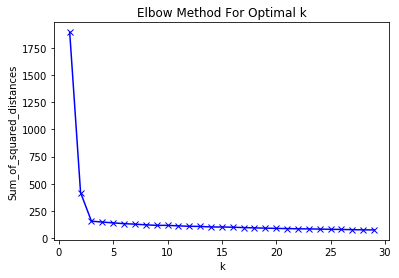

In [736]:
plt.plot(range(1,30), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [774]:
k=3
km = KMeans(n_clusters=k, algorithm='auto')
km.fit(F_678_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [775]:
F_678_transformed = pd.DataFrame(F_678_transformed)
F_678_transformed.columns = m2.columns[:34]
F_678_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.178947,0.026087,0.017857,0.188377,0.092109,0.75,1.0,0.0,0.003578,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813
1,0.095789,0.007699,0.017857,0.155311,0.055712,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813
2,0.263158,0.013569,0.017857,0.248497,0.068333,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.006135,0.000000,0.0,0.00000
3,0.117895,0.005217,0.017857,0.098196,0.071450,0.75,1.0,0.0,0.003578,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813
4,0.099649,0.044807,0.017857,0.133601,0.094595,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.016304,0.0,0.0,0.0,0.003067,0.003077,0.0,0.00000


In [776]:
F_678_transformed = pd.DataFrame(F_678_transformed)
F_678_transformed.columns = m2.columns[:34]
F_678_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.178947,0.026087,0.017857,0.188377,0.092109,0.75,1.0,0.0,0.003578,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813
1,0.095789,0.007699,0.017857,0.155311,0.055712,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813
2,0.263158,0.013569,0.017857,0.248497,0.068333,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.006135,0.000000,0.0,0.00000
3,0.117895,0.005217,0.017857,0.098196,0.071450,0.75,1.0,0.0,0.003578,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813
4,0.099649,0.044807,0.017857,0.133601,0.094595,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.016304,0.0,0.0,0.0,0.003067,0.003077,0.0,0.00000


In [777]:
F_678_transformed['predict'] = km.predict(F_678_transformed)
F_678_transformed['predict'].value_counts()

1    2804
0    1272
2     272
Name: predict, dtype: int64

In [778]:
F_678_transformed.index = F_678.index
F_678_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9,predict
107,0.178947,0.026087,0.017857,0.188377,0.092109,0.75,1.0,0.0,0.003578,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813,0
221,0.095789,0.007699,0.017857,0.155311,0.055712,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813,1
307,0.263158,0.013569,0.017857,0.248497,0.068333,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.006135,0.000000,0.0,0.00000,0
425,0.117895,0.005217,0.017857,0.098196,0.071450,0.75,1.0,0.0,0.003578,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00813,1
555,0.099649,0.044807,0.017857,0.133601,0.094595,0.75,1.0,0.0,0.000000,0.0,...,0.0,0.016304,0.0,0.0,0.0,0.003067,0.003077,0.0,0.00000,1


<BarContainer object of 10 artists>

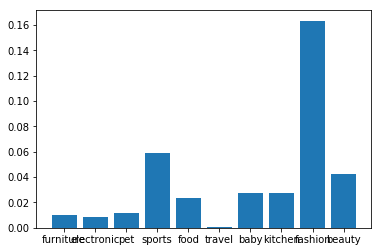

In [779]:
labels=['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
sum_of_sum = F_678[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
#plt.ylim(0, 0.5)
#group0
idx=np.where(F_678_transformed['predict']==0)
clustering = F_678.loc[F_678.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

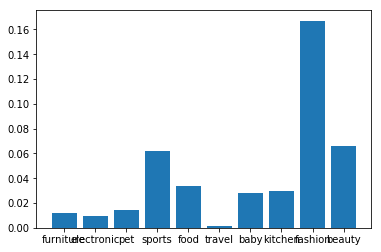

In [780]:
#plt.ylim(0, 0.3)
#group1
idx=np.where(F_678_transformed['predict']==1)
clustering = F_678.loc[F_678.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

<BarContainer object of 10 artists>

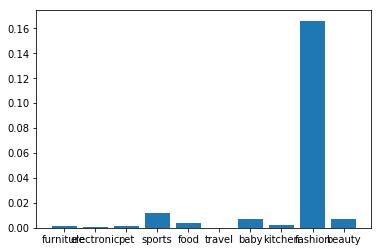

In [781]:
#plt.ylim(0, 0.3)
#group2
idx=np.where(F_678_transformed['predict']==2)
clustering = F_678.loc[F_678.index[idx]] 
plt.bar(labels,clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum)

In [893]:
def clustering_index(k, new_data, data, transformed_data, category) :
    
    #k : clustering 개수
    #new_data : new data
    #data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    #transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    #category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([3,10])
    for kk in range(k) :
       # sum_of_sum = data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        idx=np.where(F_678_transformed['predict']==kk)

        clustering = data.loc[data.index[idx]] 
        sum_of_sum = clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        category_rate[kk] = log(clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()+0.0000000001)/sum_of_sum

    
    diatance_from_centers = [0] * k

    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data)**2))
        
    result = [0] * k
    for i in range(k) :
        result[i] = (category_rate[i][category]/diatance_from_centers[i])
    
    return sum(result)

In [894]:
import random
#random data generate
for ii in range(10) :
    random_idx = F_678_transformed.index[random.randint(0,len(F_678_transformed))]
    random_data = F_678_transformed.loc[random_idx, :"month_9"]
    diatance_from_centers = [0] * k
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - random_data)**2))

    print(diatance_from_centers)

[1.2542295519781852, 1.3248003902684693, 1.2599055170454756]
[1.2879700180821443, 1.4177975352764842, 1.2548761457130742]
[1.278076946488029, 1.3978067128380824, 1.2517860024529865]
[1.2763253057764052, 1.3938091540589843, 1.2512869204471047]
[1.2633900640430487, 1.3086150914760175, 1.2878178686489121]
[1.2797760258665227, 1.2561242913221635, 1.3400802325585925]
[1.2741842830522845, 1.3905627347114915, 1.2506083001649264]
[1.262718163793371, 1.3396542855703217, 1.2657331609658844]
[1.3579914469813745, 1.273555758740056, 1.4478144604564696]
[1.2650253517906644, 1.3148075564348054, 1.2843832742138113]


In [895]:
score=[]
for i in range(10) :
    score.append(clustering_index(3, random_data, F_678, F_678_transformed, i)*10000)
score=pd.DataFrame(score)
labels_=pd.DataFrame(labels)
buylist=pd.DataFrame(F_678.loc[random_idx,'CLAC0_0':'CLAC0_9'].values)
scoreDF=pd.concat([labels_,score,buylist], axis=1)
scoreDF.columns=['Category','Score','Buy_CT']
scoreDF.sort_values(['Score'],ascending=False)

,Category,Score,Buy_CT
8,fashion,20.289840,0.0
3,sports,16.032446,1.0
9,beauty,15.243321,0.0
6,baby,14.417072,0.0
4,food,13.679664,1.0
7,kitchen,13.258207,0.0
0,furniture,11.803798,0.0
2,pet,11.437472,0.0
1,electronic,10.483936,1.0
5,travel,-23.349708,0.0


In [907]:
labels

['furniture',
 'electronic',
 'pet',
 'sports',
 'food',
 'travel',
 'baby',
 'kitchen',
 'fashion',
 'beauty']

In [909]:
import tqdm
F_678_pet=[]
for i in tqdm.tqdm(arange(len(F_678))):
        F_678_pet.append(clustering_index(3, i, F_678, F_678_transformed, 2))

100%|██████████████████████████████████████████████████████████████████████████████| 4348/4348 [01:05<00:00, 66.13it/s]


In [921]:
pd.DataFrame(F_678_pet)*10000

,0
0,57.403079
1,2.574388
2,1.275376
3,0.847388
4,0.634437
5,0.507012
6,0.422208
7,0.361707
8,0.316372
9,0.281135
